# CW2 - Machine/Deep learning algorithms in cryptocurrency trading

### Data set selection and definition of ML objective

**Objectives**:

1. Use machine/deep learning to predict important cryptocurrency trading parameters namely **price direction**, **volatility** and **price range**.

- **Price Direction**: Predicting whether the price will go up or down in a specified future time frame. This binary outcome (up/down) is often more practical and potentially more accurate than predicting exact future prices.

- **Volatility**: Forecasting the future volatility of a cryptocurrency can be useful for risk management and for strategies that are sensitive to price fluctuations.

- **Price Range**: Predicting the high and low prices for a future period can provide insights into expected price movements and help set stop-loss and take-profit levels.

2. Make predictions for the 5 most popular cryptocurrencies. **Bitcoin**, **Ethereum**, **Ripple**, **Litecoin** and **Monero**.

[Kaggle - Top 100 Cryptocurrencies Historical Dataset](https://www.kaggle.com/datasets/kaushiksuresh147/top-10-cryptocurrencies-historical-dataset/data)

In [1]:
# First lets set the path for Kaggle API
import os

kaggle_dir = os.path.join(os.path.expanduser('~'), '.kaggle')
kaggle_file = os.path.join(kaggle_dir, 'kaggle.json')

# Check if the .kaggle directory exists before creating it
if not os.path.exists(kaggle_dir):
    os.system("mkdir -p " + kaggle_dir)
    print("Created directory " + kaggle_dir)
else:
    print("Directory " + kaggle_dir + " already exists")

# Check if the kaggle.json file exists in the .kaggle directory before moving it
if not os.path.exists(kaggle_file):
    os.system("mv kaggle.json " + kaggle_file)
    os.system("chmod 600 " + kaggle_file)
    print(f"Moved kaggle.json to {kaggle_file} and changed its permissions")
else:
    print("File " + kaggle_file + " already exists, changing its permissions not needed")


# Check if the zip file exists before downloading
if not os.path.exists('top-10-cryptocurrencies-historical-dataset.zip'):
    !kaggle datasets download -d kaushiksuresh147/top-10-cryptocurrencies-historical-dataset
    !unzip top-10-cryptocurrencies-historical-dataset.zip
    print("Downloaded and unzipped top-10-cryptocurrencies-historical-dataset.zip")
else:
    print("File top-10-cryptocurrencies-historical-dataset.zip already exists")

Directory /home/realtime/.kaggle already exists
File /home/realtime/.kaggle/kaggle.json already exists, changing its permissions not needed
File top-10-cryptocurrencies-historical-dataset.zip already exists


### Data preparation and Analysis

In [2]:
# Loading the data into dataframes
import pandas as pd

# List of cryptocurrencies
cryptos = ['bitcoin', 'litecoin', 'ethereum', 'xrp']

# Dictionary to store the dataframes
dfs = {}

# Load each CSV file into a DataFrame and store it in the dictionary
for crypto in cryptos:
    df_name = 'raw_' + crypto + '_pd'
    dfs[df_name] = pd.read_csv(f'Top 100 Crypto Coins/{crypto}.csv')
    print(f"Top 5 rows of {df_name}:")
    print(dfs[df_name].head())
    print("\n")

    print(f"Statistics for {df_name}:")
    print(dfs[df_name].describe())
    print("\n")
    
    print(f"Missing values in {df_name}:")
    print(dfs[df_name].isnull().sum())
    print("\n")


Top 5 rows of raw_bitcoin_pd:
         Date  Open  High  Low  Close  Volume Currency
0  2010-07-18   0.0   0.1  0.1    0.1      75      USD
1  2010-07-19   0.1   0.1  0.1    0.1     574      USD
2  2010-07-20   0.1   0.1  0.1    0.1     262      USD
3  2010-07-21   0.1   0.1  0.1    0.1     575      USD
4  2010-07-22   0.1   0.1  0.1    0.1    2160      USD


Statistics for raw_bitcoin_pd:
               Open          High           Low         Close        Volume
count   4420.000000   4420.000000   4420.000000   4420.000000  4.420000e+03
mean    8302.221855   8531.971380   8043.473869   8306.969457  1.395788e+07
std    14598.398937  14992.605971  14146.499234  14599.046649  1.645973e+08
min        0.000000      0.100000      0.000000      0.100000  0.000000e+00
25%      122.500000    129.975000    118.300000    122.800000  3.013600e+04
50%      683.600000    706.500000    657.550000    685.000000  6.762050e+04
75%     8877.250000   9122.700000   8666.900000   8886.075000  1.769402e+05

In [3]:
import plotly.graph_objects as go

# Get the DataFrame for Bitcoin
df_bitcoin_1 = dfs['raw_bitcoin_pd'].copy()

# Create a candlestick plot
fig = go.Figure(data=[go.Candlestick(x=df_bitcoin_1['Date'],
                open =df_bitcoin_1['Open'],
                high =df_bitcoin_1['High'],
                low  =df_bitcoin_1['Low'],
                close=df_bitcoin_1['Close'])])

# Set the title and axis labels
fig.update_layout(
    title='Bitcoin Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price(USD)',
)

# Show the plot
fig.show()

In [4]:
# Let's analyse Bitcoin's price for t

df_bitcoin_1['Date'] = pd.to_datetime(df_bitcoin_1['Date'])

# Get the date one year ago from the latest date in the DataFrame
one_year_ago = df_bitcoin_1['Date'].max() - pd.DateOffset(years=1)

# Filter the DataFrame to include only the data from the last year
df_bitcoin_last_year = df_bitcoin_1[df_bitcoin_1['Date'] >= one_year_ago]

# Create a candlestick plot for the last year's worth of data
fig = go.Figure(data=[go.Candlestick(x=df_bitcoin_last_year['Date'],
                open=df_bitcoin_last_year['Open'],
                high=df_bitcoin_last_year['High'],
                low=df_bitcoin_last_year['Low'],
                close=df_bitcoin_last_year['Close'])])

# Set the title and axis labels
fig.update_layout(
    title='Bitcoin Candlestick Chart (Last Year)',
    xaxis_title='Date',
    yaxis_title='Price(USD)',
)

# Show the plot
fig.show()

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

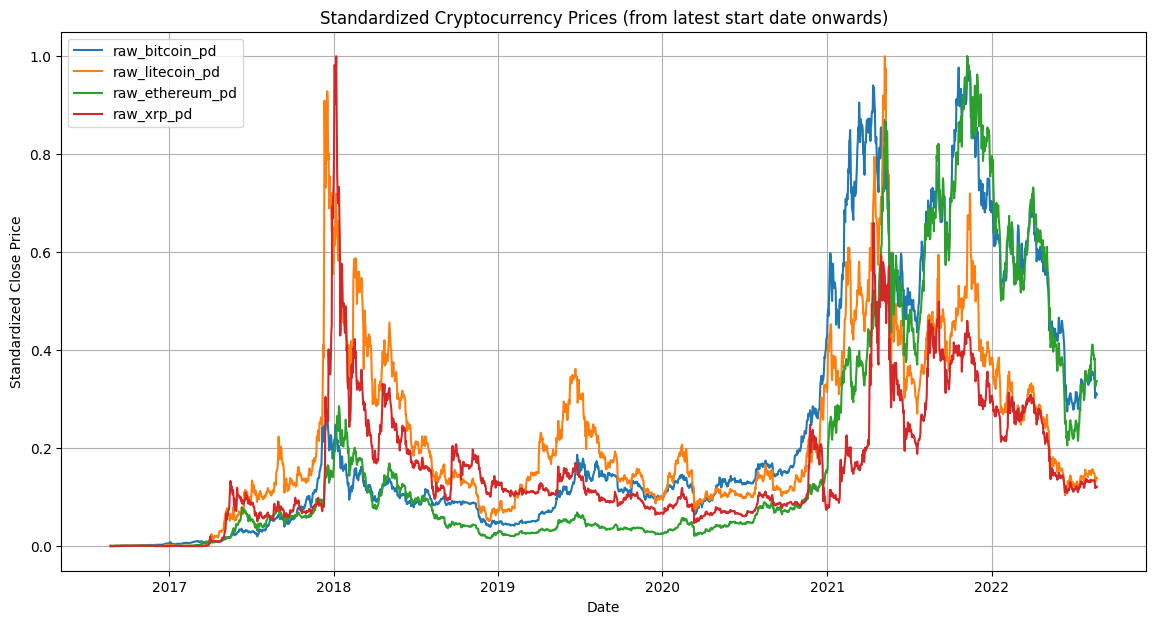

In [5]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

dfs_copied = dfs.copy()
scaler = MinMaxScaler()

# Convert 'Date' to datetime and set it as index
for df_name, df in dfs_copied.items():
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

# Find the latest starting date among all the cryptocurrencies
latest_start_date = max(df.index.min() for df in dfs_copied.values())

# Plot each cryptocurrency's closing price
plt.figure(figsize=(14, 7))
for df_name, df in dfs_copied.items():
    df = df.loc[df.index >= latest_start_date]  # Filter data from the latest start date onwards
    df.loc[:, 'Close'] = scaler.fit_transform(df[['Close']])  # Standardize 'Close' price
    plt.plot(df.index, df['Close'], label=df_name)

plt.title('Standardized Cryptocurrency Prices (from latest start date onwards)')
plt.xlabel('Date')
plt.ylabel('Standardized Close Price')
plt.legend()
plt.grid(True)
plt.show()

### Model Selection and Training

#### Building a model (1)

            Open  High  Low  Close  Volume Currency  SMA_50  SMA_200  \
Date                                                                   
2011-02-02   0.7   0.8  0.7    0.7    5627      USD   0.336   0.1945   
2011-02-03   0.7   0.8  0.7    0.7    8525      USD   0.346   0.1975   
2011-02-04   0.7   0.9  0.7    0.8   42222      USD   0.356   0.2010   
2011-02-05   0.8   0.9  0.8    0.9   15787      USD   0.370   0.2050   
2011-02-06   0.9   0.9  0.8    0.9    8744      USD   0.384   0.2090   
2011-02-07   0.9   0.9  0.8    0.9    2264      USD   0.398   0.2130   

              EMA_50   EMA_200      MACD  Signal_Line    RSI  Daily_Return  \
Date                                                                         
2011-02-02  0.362980  0.231407  0.074939     0.045136  100.0      0.000000   
2011-02-03  0.376197  0.236069  0.085494     0.053207  100.0      0.000000   
2011-02-04  0.392816  0.241681  0.100766     0.062719  100.0      0.142857   
2011-02-05  0.412706  0.248231  0

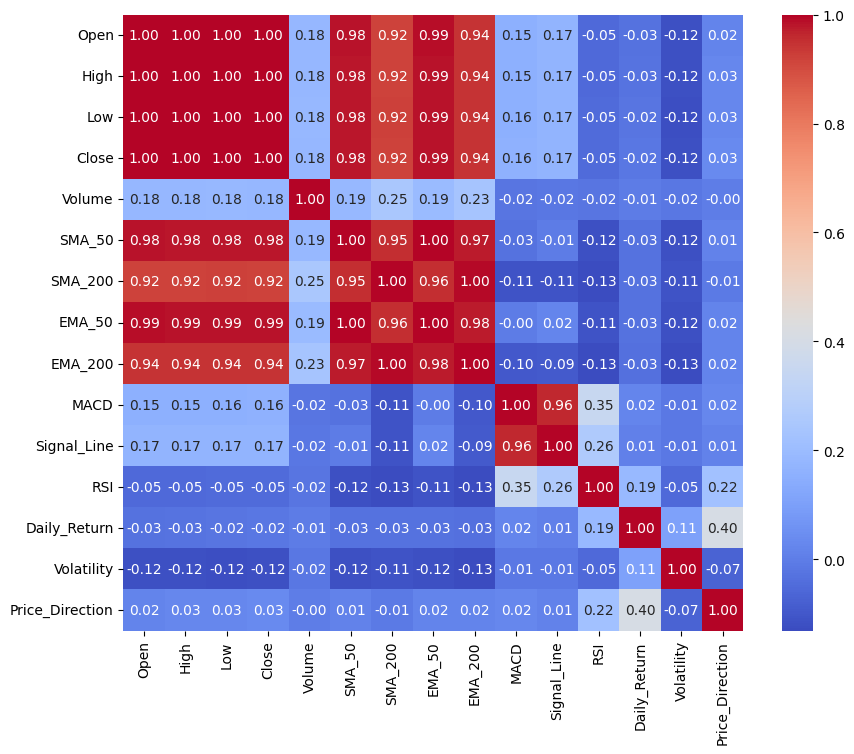

                    Close
Close            1.000000
High             0.999556
Low              0.999468
Open             0.998996
EMA_50           0.985747
SMA_50           0.981267
EMA_200          0.943088
SMA_200          0.919309
Volume           0.182242
Signal_Line      0.169732
MACD             0.156964
Price_Direction  0.033989
Daily_Return    -0.019557
RSI             -0.048863
Volatility      -0.120992

Percentages:
 0    51.493213
1    48.506787
Name: Price_Direction, dtype: float64


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# We need to add more features to the model to improve its accuracy
# Assuming dfs['raw_bitcoin_pd'] is your DataFrame for Bitcoin
df_bitcoin_2 = dfs['raw_bitcoin_pd'].copy()

# Calculate Moving Averages
df_bitcoin_2['SMA_50']  = df_bitcoin_2['Close'].rolling(window=50).mean()
df_bitcoin_2['SMA_200'] = df_bitcoin_2['Close'].rolling(window=200).mean()

# Calculate Exponential Moving Averages
df_bitcoin_2['EMA_50'] = df_bitcoin_2['Close'].ewm(span=50, adjust=False).mean()
df_bitcoin_2['EMA_200'] = df_bitcoin_2['Close'].ewm(span=200, adjust=False).mean()

# Calculate MACD
# MACD Line = 12-day EMA - 26-day EMA
# Signal Line = 9-day EMA of MACD Line
# MACD Histogram = MACD Line - Signal Line
EMA_12 = df_bitcoin_2['Close'].ewm(span=12, adjust=False).mean()
EMA_26 = df_bitcoin_2['Close'].ewm(span=26, adjust=False).mean()
df_bitcoin_2['MACD'] = EMA_12 - EMA_26
df_bitcoin_2['Signal_Line']    = df_bitcoin_2['MACD'].ewm(span=9, adjust=False).mean()

# Calculate RSI
delta = df_bitcoin_2['Close'].diff(1)
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
RS = gain / loss
df_bitcoin_2['RSI'] = 100 - (100 / (1 + RS))

# Calculate Volatility (as the standard deviation of daily returns)
df_bitcoin_2['Daily_Return'] = df_bitcoin_2['Close'].pct_change()
df_bitcoin_2['Volatility']   = df_bitcoin_2['Close'].pct_change().rolling(window=50).std() * np.sqrt(50)

# If today's close is higher than yesterday's close, price direction is 1 (up), otherwise 0 (down or unchanged)
df_bitcoin_2['Price_Direction'] = (df_bitcoin_2['Close'] > df_bitcoin_2['Close'].shift(1)).astype(int)

# Display the head of the DataFrame to verify the new columns
print(df_bitcoin_2.iloc[199:205])


# Calculate the correlation matrix
correlation_matrix = df_bitcoin_2.corr()

# Focus on the 'High' and 'Low' columns
correlation_with_target = correlation_matrix[['Close']].sort_values(by='Close', ascending=False)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()
# Print the correlation values
print(correlation_with_target)

# Print the percentage for bitcoin price direction
counts = df_bitcoin_2['Price_Direction'].value_counts()
percentages = counts / len(df_bitcoin_2) * 100
print(f"\nPercentages:\n {percentages}")

In [7]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

def feature_importance_verifier(df, feature):
    # Ensure specified columns exist in the DataFrame, then drop them if they do
    y = df[feature]  # Target variable
    columns_to_drop = ['High', 'Low', 'Date', 'Currency', 'Open', 'Close', feature]
    X = df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1)

    # Initialize the random forest
    xgb = XGBRegressor(n_estimators=100, random_state=42)

    # Initialize TimeSeriesSplit
    tscv = TimeSeriesSplit(n_splits=5)

    # Perform cross-validation
    cv_scores = cross_val_score(xgb, X, y, cv=tscv, scoring='neg_mean_squared_error')

    # Print cross-validation scores
    print(f"Cross-validation scores (MSE): {-cv_scores}")
    print(f"Mean cross-validation score (MSE): {-cv_scores.mean()}")

    # Fit the model to the data
    xgb.fit(X, y)

    # Extract feature importance
    importances = xgb.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print(f"Feature ranking for {feature}:")
    for f in range(X.shape[1]):
        print(f"{f + 1}. feature {X.columns[indices[f]]} ({importances[indices[f]]})")
  

In [8]:
# We know our data has NaN values, so we need to clean it before training the models
initial_row_count = len(df_bitcoin_2)
df_bitcoin_2_clean = df_bitcoin_2.dropna()
rows_removed = initial_row_count - len(df_bitcoin_2_clean)
feature_importance_verifier(df_bitcoin_2_clean.copy(), 'Close')
print(f"Number of rows removed: {rows_removed}")

Cross-validation scores (MSE): [2.02985273e+05 4.43648459e+04 4.03102073e+07 2.26310138e+06
 9.23542688e+08]
Mean cross-validation score (MSE): 193272669.3459522
Feature ranking for Close:
1. feature SMA_50 (0.7957859039306641)
2. feature EMA_50 (0.18052423000335693)
3. feature MACD (0.012523170560598373)
4. feature Signal_Line (0.005323401186615229)
5. feature SMA_200 (0.002204397926107049)
6. feature EMA_200 (0.001144586130976677)
7. feature RSI (0.0010754710528999567)
8. feature Volatility (0.0008967593312263489)
9. feature Daily_Return (0.0003776152152568102)
10. feature Volume (0.00014442972315009683)
11. feature Price_Direction (0.0)
Number of rows removed: 203


#### Building a baseline model LSTM

In [9]:
import numpy as np
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
#from tensorflow.keras.regularizers import l2
import matplotlib.dates as mdates
#from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error

def plot_loss(history, title):
    """
    Plots the training loss and validation loss against the number of epochs.

    Parameters:
    - history: The history object returned by the fit method of a Keras model.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()



def plot_model_predictions(models, X_val_scaled, y_val_scaled, dates_val, scaler_y):
    """
    Plots actual data and predictions from multiple models.
    """
    # Initialize plot
    plt.figure(figsize=(12, 6))
    
    # Plot actual data
    actual = scaler_y.inverse_transform(y_val_scaled)
    plt.scatter(dates_val, actual, label='Actual', color='blue', s=10)  # Use scatter plot for actual data
    plt.plot(dates_val, actual, color='blue', linewidth=1, alpha=0.7)  # Connect actual data points with a line
    
    # Generate and plot predictions for each model
    for i, model in enumerate(models):
        # Generate predictions
        predictions_scaled = model.predict(X_val_scaled)
        predictions = scaler_y.inverse_transform(predictions_scaled)
        
        # Plot predictions with scatter and lines
        plt.scatter(dates_val, predictions, label=f'Model {(i+1)} Predictions', s=10)  # Scatter plot for predictions
        plt.plot(dates_val, predictions, linewidth=1, alpha=0.7)  # Connect prediction dots with a line
    
    # Plot formatting
    plt.title('Actual vs. Predicted Prices(Validation Set)')
    plt.xlabel('Date')
    plt.ylabel('Price(USD)')
    plt.legend()
    plt.xticks(rotation=45)  # Rotate dates for better visibility
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format dates
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))  # Adjust interval as needed
    plt.gcf().autofmt_xdate()  # Beautify the x-labels
    plt.tight_layout()
    plt.show()


def plot_test_predictions(model, X_test_scaled, y_test_scaled, dates_test, scaler_y):
    """
    Plots actual test dataset vs predicted results.
    """
    # Generate predictions
    predictions_scaled = model.predict(X_test_scaled)
    predictions = scaler_y.inverse_transform(predictions_scaled)
    actual = scaler_y.inverse_transform(y_test_scaled)

    # Compute Metrics
    rmse = np.sqrt(mean_squared_error(actual, predictions))
    mae = mean_absolute_error(actual, predictions)
    mape = np.mean(np.abs((actual - predictions) / actual)) * 100
    smape = 100 * np.mean(2 * np.abs(predictions - actual) / (np.abs(actual) + np.abs(predictions)))

    # Save metrics to file
    model_info = f"Model: {model.__class__.__name__}"  # Customize with more details as needed
    metrics_info = f"RMSE: {rmse}, MAE: {mae}, MAPE: {mape}%, sMAPE: {smape}%\n"
    with open("model_test_data_metrics.txt", "a") as file:
        file.write(model_info + '\n' + metrics_info + '\n')

    # Initialize plot
    plt.figure(figsize=(12, 6))
    plt.plot(dates_test, actual, label='Actual', color='blue', linewidth=1)
    plt.plot(dates_test, predictions, label='Predicted', color='red', linestyle='--', linewidth=1)
    plt.title('Bitcoin price predictions (Test Set)')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.xticks(rotation=45)  # Rotate dates for better visibility
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Show year-month only for less clutter
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Place a tick on the first day of each month
    plt.gcf().autofmt_xdate()  # Beautify the x-labels
    plt.tight_layout()
    plt.show()

2024-03-22 15:35:08.690323: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-22 15:35:08.717258: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-22 15:35:08.717302: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-22 15:35:08.718556: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-22 15:35:08.724131: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-22 15:35:08.725137: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import GRU, Dropout, Dense
from tensorflow.keras.models import Sequential
from keras_tuner import HyperModel
from keras_tuner.tuners import Hyperband
import json

class GRUHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()
        model.add(GRU(units=hp.Int('units', min_value=32, max_value=512, step=32),
                      return_sequences=True,
                      input_shape=self.input_shape))
        model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
        model.add(GRU(units=hp.Int('units', min_value=32, max_value=512, step=32)))
        model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))
        model.add(Dense(1))
        
        model.compile(optimizer='adam', loss='mean_squared_error')
        return model
    
def find_and_save_hyperparameter(df, features, target, train_percent, val_percent):
    # Prepare the data
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    
    X = df[features]
    y = df[[target]]  # Keeping it as DataFrame
    
    # Scale features and target
    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y)
    
    # Reshape for LSTM [samples, time steps, features]
    X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))
    
    # Calculate the number of rows for training and validation
    total_rows = len(df)
    train_end = int(total_rows * train_percent)
    val_end = train_end + int(total_rows * val_percent)
    
    # Split data
    X_train_scaled = X_scaled[:train_end]
    y_train_scaled = y_scaled[:train_end]
    X_val_scaled = X_scaled[train_end:val_end]
    y_val_scaled = y_scaled[train_end:val_end]

    input_shape = (X_train_scaled.shape[1], X_train_scaled.shape[2])

    tuner = Hyperband(
        GRUHyperModel(input_shape),
        objective='val_loss',
        max_epochs=20,
        directory='my_dir',
        project_name='gru_tuning'
    )

    tuner.search(X_train_scaled, y_train_scaled, epochs=10, validation_data=(X_val_scaled, y_val_scaled))

    # Save the tuning results to a file
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    model_metrics = {
        'units': best_hps.get('units'),
        'dropout_1': best_hps.get('dropout_1'),
        'dropout_2': best_hps.get('dropout_2')
    }

    with open('model_hyperparameter_tuning.txt', 'w') as f:
        json.dump(model_metrics, f)
        

In [11]:
features = ['EMA_50', 'EMA_200', 'SMA_200', 'SMA_50', 'MACD', 'Signal_Line']
target = 'Close'

train_split      = 0.80
validation_split = 0.10

#find_and_save_hyperparameter(df_bitcoin_2_clean.copy(), features, target, train_split, validation_split)

In [12]:
from tensorflow.keras.layers import Bidirectional, GRU, Dropout, Dense

def prepare_data(df, features, target, train_percent, val_percent):
    # Prepare the data
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    if df.index.name != 'Date':
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
    
    X = df[features]
    y = df[[target]]  # Keeping it as DataFrame
    
    # Scale features and target
    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y)
    
    # Reshape for LSTM [samples, time steps, features]
    X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))
    
    # Calculate the number of rows for training and validation
    total_rows = len(df)
    train_end = int(total_rows * train_percent)
    val_end = train_end + int(total_rows * val_percent)
    
    # Split data
    X_train_scaled = X_scaled[:train_end]
    y_train_scaled = y_scaled[:train_end]
    X_val_scaled = X_scaled[train_end:val_end]
    y_val_scaled = y_scaled[train_end:val_end]

    return X_scaled, y_scaled, X_train_scaled, y_train_scaled, X_val_scaled, y_val_scaled, scaler_y

def complete_workflow_and_plot(df, models, features, target, train_percent, val_percent, epochs=20, batch_size=32):
    """
    This function encapsulates the entire workflow: preparing data, building and training the model,
    and plotting the predictions alongside actual values with dates on the x-axis.
    """
    X_scaled, y_scaled, X_train_scaled, y_train_scaled, X_val_scaled, y_val_scaled, scaler_y = prepare_data(df, 
                                                                                                            features, 
                                                                                                            target, 
                                                                                                            train_percent, 
                                                                                                            val_percent)
    
    # Calculate the number of rows for training and validation
    total_rows = len(df)
    train_end = int(total_rows * train_percent)
    val_end = train_end + int(total_rows * val_percent)
    
    X_test = X_scaled[val_end:]
    y_test = y_scaled[val_end:]
    dates_test = df.index[val_end:]  # Extract test dates
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

    for i, model in enumerate(models, start=1):  # start=1 begins counting from 1
        model.compile(optimizer='adam', loss='mean_squared_error') # compile the models first !
        history = model.fit(X_train_scaled, 
                            y_train_scaled, 
                            epochs=epochs, 
                            batch_size=batch_size, 
                            validation_data=(X_val_scaled, y_val_scaled), 
                            verbose=1, 
                            callbacks=[early_stopping])
        
        #plot_loss(history, f"Model {i} Training/Validation Loss")
        plot_test_predictions(model, X_test, y_test, dates_test, scaler_y)

    # Now plot the predictions alongside the actual validation data
    #plot_model_predictions(models, X_val_scaled, y_val_scaled, dates_val, scaler_y)

2024-03-22 15:35:10.021856: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-22 15:35:10.027253: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/50
106/106 [==============================] - 4s 20ms/step - loss: 0.0087 - val_loss: 0.0364
Epoch 2/50
106/106 [==============================] - 2s 16ms/step - loss: 0.0012 - val_loss: 0.0659
Epoch 3/50
14/14 [==============================] - 0s 3ms/step


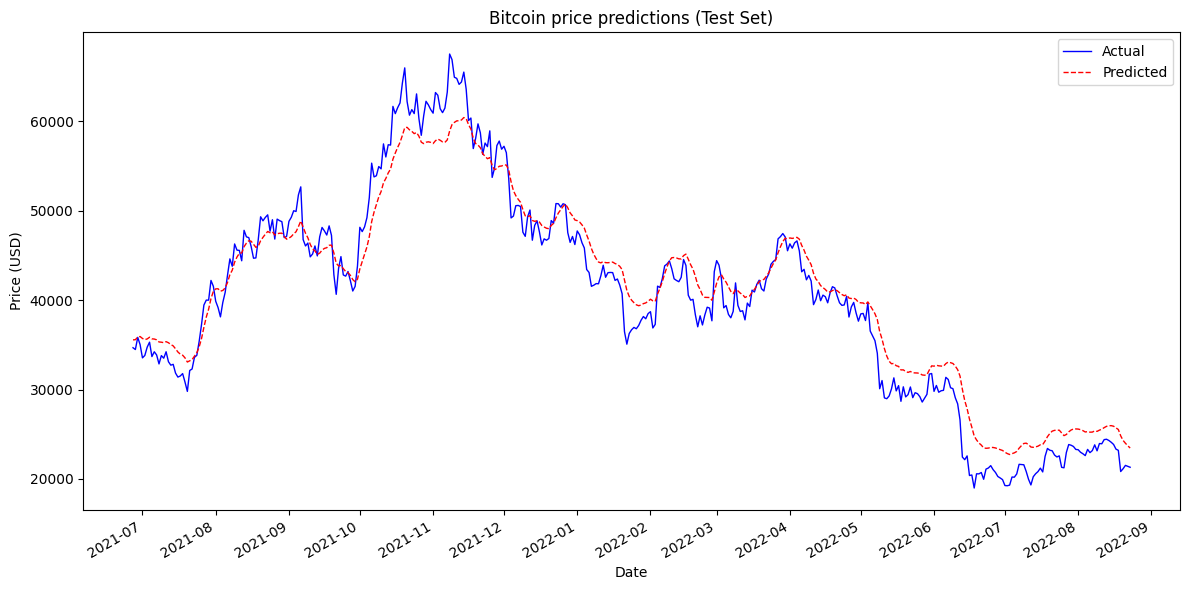

Epoch 1/50
106/106 [==============================] - 5s 27ms/step - loss: 0.0154 - val_loss: 0.1650
Epoch 2/50
106/106 [==============================] - 3s 24ms/step - loss: 0.0011 - val_loss: 0.1139
Epoch 3/50
106/106 [==============================] - 3s 25ms/step - loss: 6.1343e-04 - val_loss: 0.1614
Epoch 4/50
106/106 [==============================] - 3s 24ms/step - loss: 4.7247e-04 - val_loss: 0.0972
Epoch 5/50
106/106 [==============================] - 3s 24ms/step - loss: 4.2298e-04 - val_loss: 0.1090
Epoch 6/50
106/106 [==============================] - 3s 25ms/step - loss: 4.0189e-04 - val_loss: 0.0696
Epoch 7/50
106/106 [==============================] - 3s 25ms/step - loss: 4.1723e-04 - val_loss: 0.0401
Epoch 8/50
106/106 [==============================] - 3s 24ms/step - loss: 4.0775e-04 - val_loss: 0.0926
Epoch 9/50
14/14 [==============================] - 0s 3ms/step


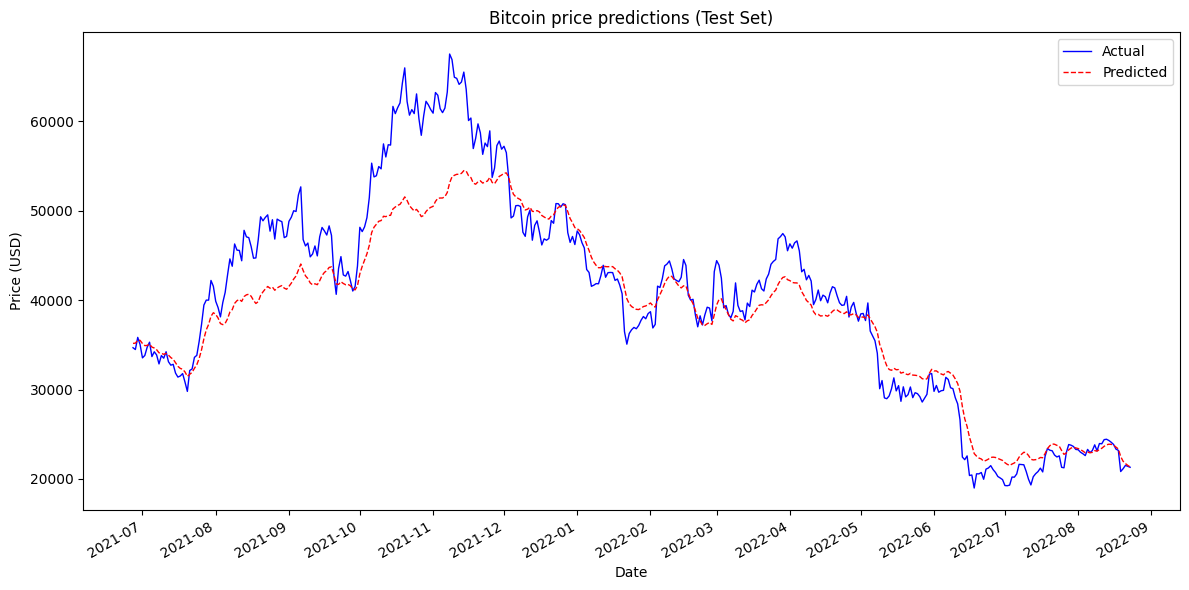

Epoch 1/50
106/106 [==============================] - 7s 34ms/step - loss: 0.0071 - val_loss: 0.0208
Epoch 2/50
106/106 [==============================] - 3s 29ms/step - loss: 0.0011 - val_loss: 0.0448
Epoch 3/50
14/14 [==============================] - 1s 4ms/step


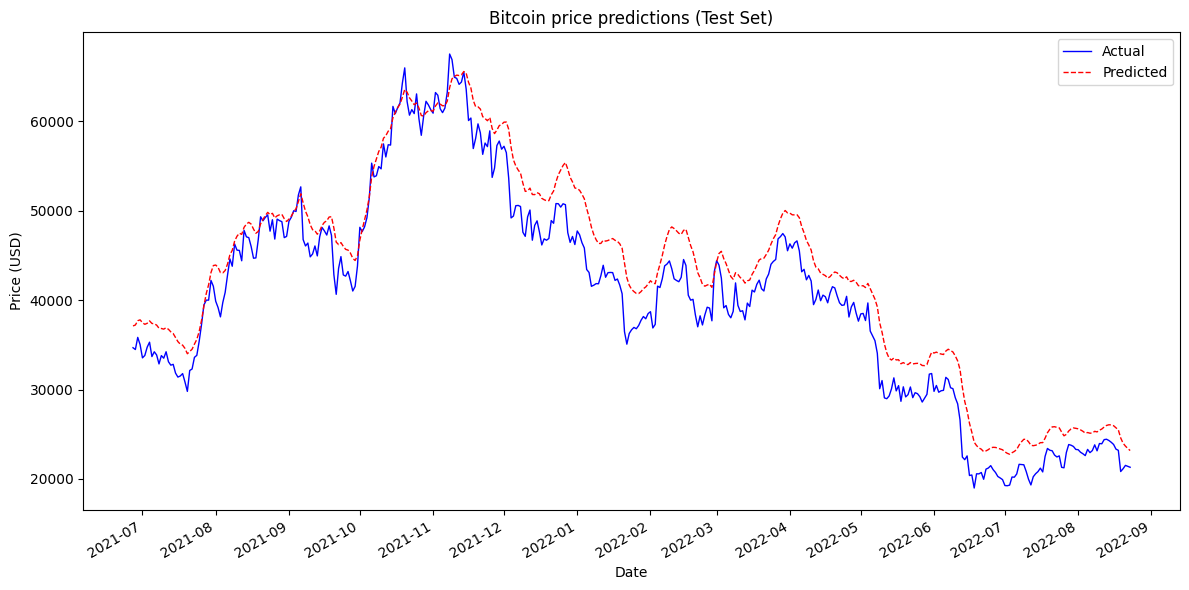

In [13]:
features = ['EMA_50', 'EMA_200', 'SMA_200', 'SMA_50', 'MACD', 'Signal_Line']
target   = 'Close'

train_split      = 0.80
validation_split = 0.10

X_scaled, y_scaled, X_train_scaled, y_train_scaled, X_val_scaled, y_val_scaled, scaler_y = prepare_data(df_bitcoin_2_clean.copy(), 
                                                                                                        features, 
                                                                                                        target, 
                                                                                                        train_split, 
                                                                                                        validation_split)

# Build the model 1
model1 = Sequential([
    GRU(352, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.3),
    GRU(512),
    Dropout(0.2),
    Dense(1)
])

# Build the model 2
model2 = Sequential([
    LSTM(448, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.1),
    LSTM(448),
    Dropout(0.1),
    Dense(1)
])

# Build the model 3
model3 = Sequential([
    Bidirectional(GRU(320, return_sequences=True), input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.40),
    Bidirectional(GRU(352)),  # Note: return_sequences defaults to False here
    Dropout(0.20),
    Dense(1)
])

# Train the models then plot their losses
models = [model1, model2, model3]

complete_workflow_and_plot(
    df=df_bitcoin_2_clean.copy(),
    models=models,
    features=features,
    target=target,
    train_percent=train_split,
    val_percent=validation_split,
    epochs=50,
    batch_size=32
)

### Investigating Feature selection

bitcoin_Close      2191
Volume             2191
SMA_50             2191
SMA_200            2191
EMA_50             2191
EMA_200            2191
MACD               2191
Signal_Line        2191
RSI                2191
Daily_Return       2191
Volatility         2191
Price_Direction    2191
litecoin_Close     2191
ethereum_Close     2191
xrp_Close          2191
dtype: int64


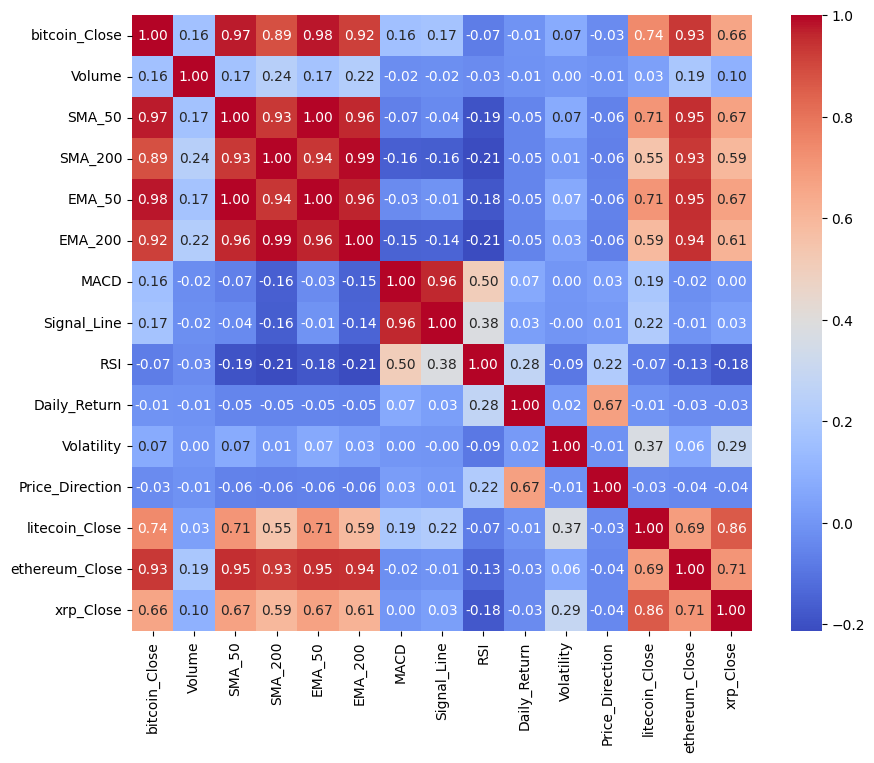

                 bitcoin_Close
bitcoin_Close         1.000000
EMA_50                0.979260
SMA_50                0.972914
ethereum_Close        0.933197
EMA_200               0.917142
SMA_200               0.885171
litecoin_Close        0.742338
xrp_Close             0.663275
Signal_Line           0.173883
Volume                0.162915
MACD                  0.159929
Volatility            0.073214
Daily_Return         -0.006410
Price_Direction      -0.032439
RSI                  -0.071419
Cross-validation scores (MSE): [2.98483558e+07 2.13578437e+06 6.70429264e+06 6.99336884e+08
 8.14678691e+07]
Mean cross-validation score (MSE): 163898637.1282037
Feature ranking for bitcoin_Close:
1. feature EMA_50 (0.8520458936691284)
2. feature EMA_200 (0.07692892849445343)
3. feature litecoin_Close (0.03696814179420471)
4. feature ethereum_Close (0.011759433895349503)
5. feature SMA_50 (0.00920824334025383)
6. feature SMA_200 (0.005326755810528994)
7. feature Signal_Line (0.004306803457438946)
8.

In [14]:
df_bitcoin_features = df_bitcoin_2_clean.copy()
df_bitcoin_features = df_bitcoin_features.drop(['Currency', 'Open', 'High', 'Low'], axis=1)
df_bitcoin_features = df_bitcoin_features.rename(columns={'Close': 'bitcoin_Close'})
cryptos_prices_to_copy = ['litecoin', 'ethereum', 'xrp']

# Find the latest starting date among all the cryptocurrencies
latest_start_date = max(df.index.min() for df in [df_bitcoin_features] + [dfs[f'raw_{crypto}_pd'] for crypto in cryptos_prices_to_copy])

# Filter df_bitcoin_features from the latest start date onwards
df_bitcoin_features = df_bitcoin_features[df_bitcoin_features.index >= latest_start_date]

for crypto in cryptos_prices_to_copy:
    # Filter each crypto DataFrame from the latest start date onwards and add 'Close' price to df_bitcoin_features
    df_bitcoin_features[f'{crypto}_Close'] = dfs[f'raw_{crypto}_pd'].loc[dfs[f'raw_{crypto}_pd'].index >= latest_start_date, 'Close']

print(df_bitcoin_features.count())

# Calculate the correlation matrix
correlation_matrix = df_bitcoin_features.corr()
correlation_with_target = correlation_matrix[['bitcoin_Close']].sort_values(by='bitcoin_Close', ascending=False)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()
print(correlation_with_target)
feature_importance_verifier(df_bitcoin_features.copy(), 'bitcoin_Close')

Epoch 1/50
55/55 [==============================] - 3s 18ms/step - loss: 0.0527 - val_loss: 0.3110
Epoch 2/50
55/55 [==============================] - 1s 10ms/step - loss: 0.0094 - val_loss: 0.1170
Epoch 3/50
55/55 [==============================] - 1s 9ms/step - loss: 0.0086 - val_loss: 0.1129
Epoch 4/50
55/55 [==============================] - 1s 9ms/step - loss: 0.0086 - val_loss: 0.0396
Epoch 5/50
55/55 [==============================] - 1s 9ms/step - loss: 0.0080 - val_loss: 0.0765
Epoch 6/50
55/55 [==============================] - 1s 10ms/step - loss: 0.0081 - val_loss: 0.0155
Epoch 7/50
55/55 [==============================] - 1s 10ms/step - loss: 0.0075 - val_loss: 0.0502
Epoch 8/50
7/7 [==============================] - 0s 2ms/step


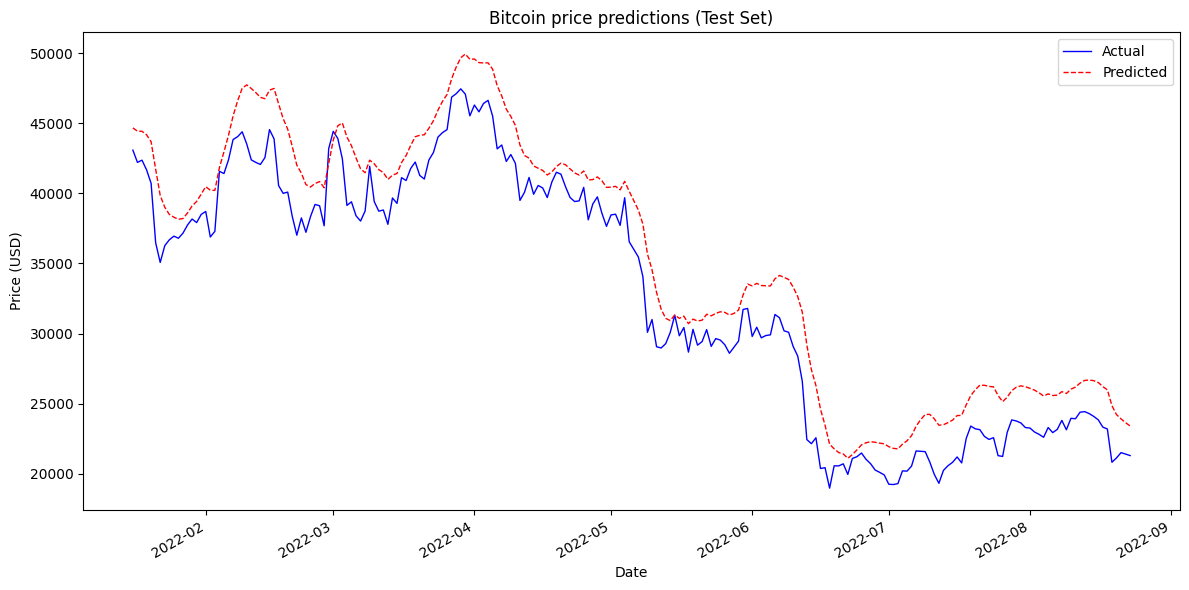

Epoch 1/50
55/55 [==============================] - 3s 19ms/step - loss: 0.1336 - val_loss: 0.4431
Epoch 2/50
55/55 [==============================] - 1s 11ms/step - loss: 0.0129 - val_loss: 0.1445
Epoch 3/50
55/55 [==============================] - 1s 11ms/step - loss: 0.0081 - val_loss: 0.1350
Epoch 4/50
55/55 [==============================] - 1s 11ms/step - loss: 0.0077 - val_loss: 0.1206
Epoch 5/50
55/55 [==============================] - 1s 11ms/step - loss: 0.0087 - val_loss: 0.0586
Epoch 6/50
55/55 [==============================] - 1s 11ms/step - loss: 0.0075 - val_loss: 0.0461
Epoch 7/50
55/55 [==============================] - 1s 11ms/step - loss: 0.0069 - val_loss: 0.0650
Epoch 8/50
55/55 [==============================] - 1s 12ms/step - loss: 0.0068 - val_loss: 0.0443
Epoch 9/50
55/55 [==============================] - 1s 12ms/step - loss: 0.0062 - val_loss: 0.0528
Epoch 10/50
7/7 [==============================] - 0s 3ms/step


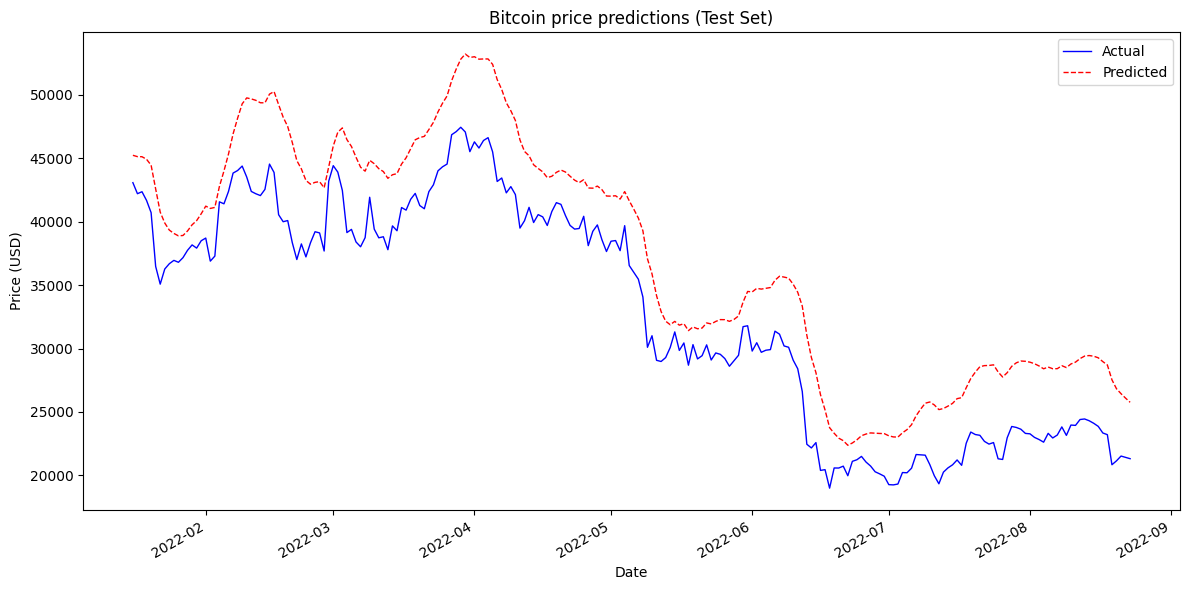

Epoch 1/50
55/55 [==============================] - 6s 56ms/step - loss: 0.0451 - val_loss: 0.1146
Epoch 2/50
55/55 [==============================] - 2s 43ms/step - loss: 0.0062 - val_loss: 0.0856
Epoch 3/50
55/55 [==============================] - 2s 43ms/step - loss: 0.0085 - val_loss: 0.0750
Epoch 4/50
55/55 [==============================] - 2s 42ms/step - loss: 0.0057 - val_loss: 0.0608
Epoch 5/50
55/55 [==============================] - 2s 44ms/step - loss: 0.0034 - val_loss: 0.0311
Epoch 6/50
55/55 [==============================] - 2s 44ms/step - loss: 0.0031 - val_loss: 0.0500
Epoch 7/50
7/7 [==============================] - 1s 6ms/step


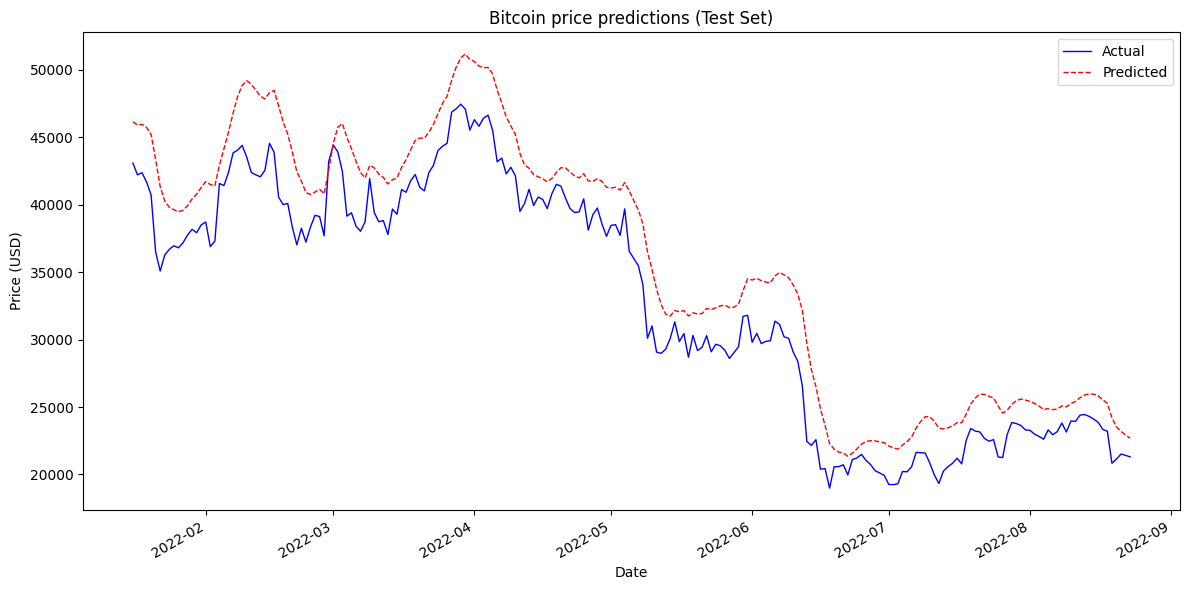

In [15]:
features = ['EMA_50', 'EMA_200', 'SMA_200', 'SMA_50', 'MACD', 'Signal_Line', 'litecoin_Close', 'ethereum_Close']
target   = 'bitcoin_Close'

X_scaled, y_scaled, X_train_scaled, y_train_scaled, X_val_scaled, y_val_scaled, scaler_y = prepare_data(df_bitcoin_features.copy(), 
                                                                                                        features, 
                                                                                                        target, 
                                                                                                        train_split, 
                                                                                                        validation_split)

model1 = Sequential([
    GRU(480, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.4),
    GRU(160),
    Dropout(0.2),
    Dense(1)
])
model2 = Sequential([
    LSTM(224, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.4),
    LSTM(384),
    Dropout(0.3),
    Dense(1)
])
model3 = Sequential([
    Bidirectional(GRU(480, return_sequences=True), input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.30),
    Bidirectional(GRU(320)),  
    Dropout(0.1),
    Dense(1)
])
models = [model1, model2, model3]
complete_workflow_and_plot(
    df=df_bitcoin_features.copy(),
    models=models,
    features=features,
    target=target,
    train_percent=train_split,
    val_percent=validation_split,
    epochs=50,
    batch_size=32
)

Epoch 1/50
55/55 [==============================] - 3s 17ms/step - loss: 0.0606 - val_loss: 0.0731
Epoch 2/50
55/55 [==============================] - 1s 9ms/step - loss: 0.0079 - val_loss: 0.0714
Epoch 3/50
55/55 [==============================] - 1s 10ms/step - loss: 0.0073 - val_loss: 0.0271
Epoch 4/50
55/55 [==============================] - 1s 10ms/step - loss: 0.0066 - val_loss: 0.0108
Epoch 5/50
55/55 [==============================] - 1s 10ms/step - loss: 0.0056 - val_loss: 0.0163
Epoch 6/50
7/7 [==============================] - 0s 3ms/step


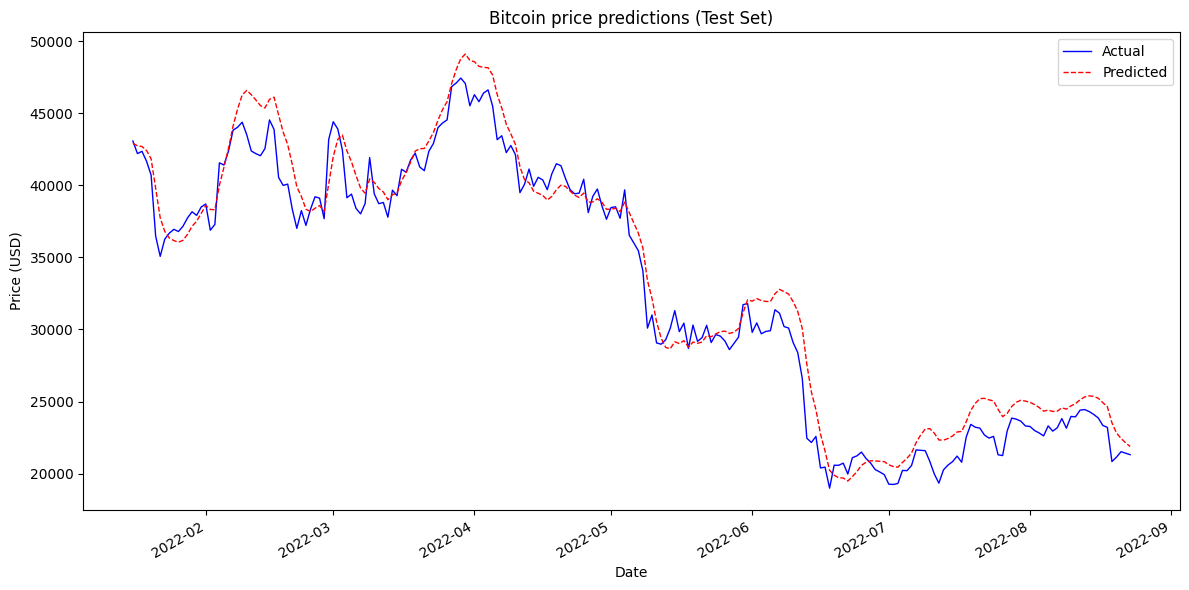

Epoch 1/50
55/55 [==============================] - 3s 28ms/step - loss: 0.1056 - val_loss: 0.1982
Epoch 2/50
55/55 [==============================] - 1s 19ms/step - loss: 0.0073 - val_loss: 0.1263
Epoch 3/50
55/55 [==============================] - 1s 19ms/step - loss: 0.0061 - val_loss: 0.0653
Epoch 4/50
55/55 [==============================] - 1s 20ms/step - loss: 0.0054 - val_loss: 0.0812
Epoch 5/50
55/55 [==============================] - 1s 19ms/step - loss: 0.0043 - val_loss: 0.0644
Epoch 6/50
55/55 [==============================] - 1s 18ms/step - loss: 0.0035 - val_loss: 0.0258
Epoch 7/50
55/55 [==============================] - 1s 18ms/step - loss: 0.0037 - val_loss: 0.0156
Epoch 8/50
55/55 [==============================] - 1s 19ms/step - loss: 0.0032 - val_loss: 0.0388
Epoch 9/50
7/7 [==============================] - 0s 3ms/step


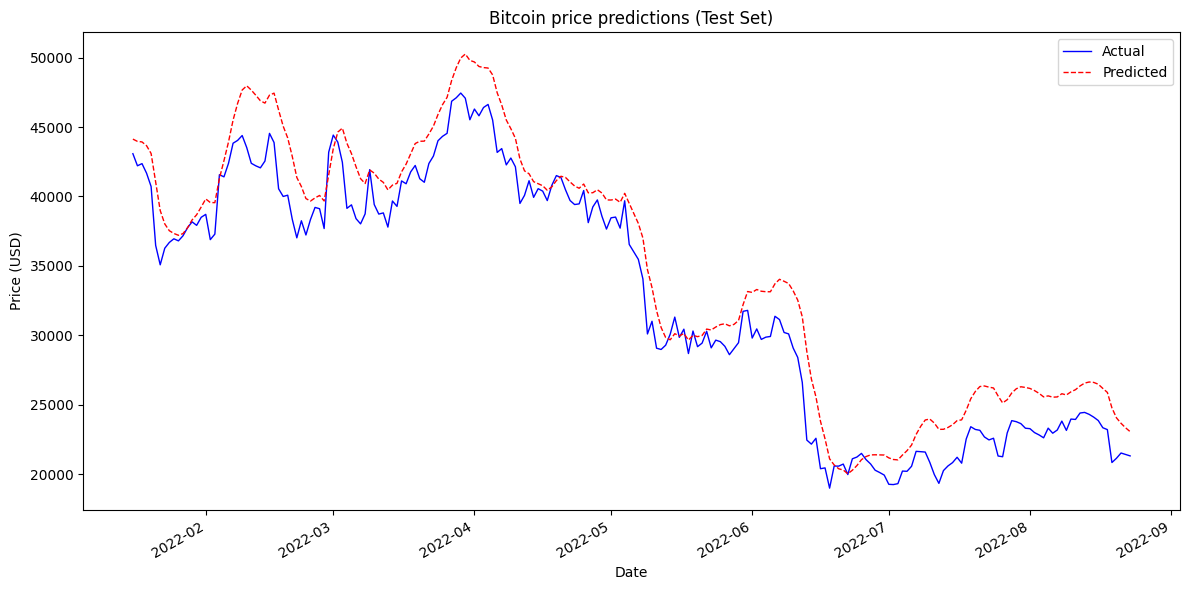

Epoch 1/50
55/55 [==============================] - 6s 33ms/step - loss: 0.0502 - val_loss: 0.1432
Epoch 2/50
55/55 [==============================] - 1s 21ms/step - loss: 0.0058 - val_loss: 0.0608
Epoch 3/50
55/55 [==============================] - 1s 20ms/step - loss: 0.0050 - val_loss: 0.0280
Epoch 4/50
55/55 [==============================] - 1s 20ms/step - loss: 0.0052 - val_loss: 0.0181
Epoch 5/50
55/55 [==============================] - 1s 21ms/step - loss: 0.0042 - val_loss: 0.0185
Epoch 6/50
55/55 [==============================] - 1s 20ms/step - loss: 0.0053 - val_loss: 0.0113
Epoch 7/50
55/55 [==============================] - 1s 21ms/step - loss: 0.0044 - val_loss: 0.0107
Epoch 8/50
55/55 [==============================] - 1s 20ms/step - loss: 0.0040 - val_loss: 0.0242
Epoch 9/50
7/7 [==============================] - 1s 3ms/step


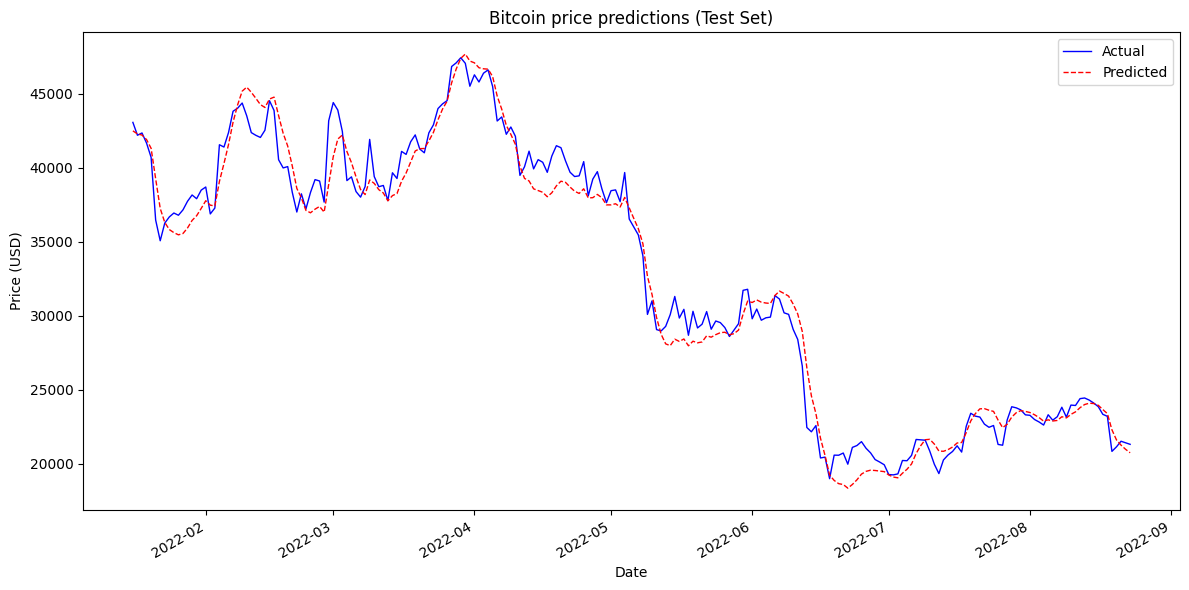

In [16]:
features = ['EMA_50', 'EMA_200', 'SMA_200', 'SMA_50', 'MACD', 'Signal_Line']
target   = 'bitcoin_Close'

X_scaled, y_scaled, X_train_scaled, y_train_scaled, X_val_scaled, y_val_scaled, scaler_y = prepare_data(df_bitcoin_features.copy(), 
                                                                                                        features, 
                                                                                                        target, 
                                                                                                        train_split, 
                                                                                                        validation_split)

model1 = Sequential([
    GRU(288, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.30),
    GRU(384),
    Dropout(0.30),
    Dense(1)
])
model2 = Sequential([
    LSTM(448, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.10),
    LSTM(352),
    Dropout(0.30),
    Dense(1)
])
model3 = Sequential([
    Bidirectional(GRU(352, return_sequences=True), input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.20),
    Bidirectional(GRU(224)),  
    Dropout(0.30),
    Dense(1)
])
models = [model1, model2, model3]

complete_workflow_and_plot(
    df=df_bitcoin_features.copy(),
    models=models,
    features=features,
    target=target,
    train_percent=train_split,
    val_percent=validation_split,
    epochs=50,
    batch_size=32
)